https://www.kaggle.com/datasets/ellipticco/elliptic-data-set

"The Elliptic Data Set maps Bitcoin transactions to real entities belonging to licit categories (exchanges, wallet providers, miners, licit services, etc.) versus illicit ones (scams, malware, terrorist organizations, ransomware, Ponzi schemes, etc.). The task on the dataset is to classify the illicit and licit nodes in the graph."



This anonymized data set is a transaction graph collected from the Bitcoin blockchain. It consists of 203,769 nodes and 234,355 edges, with 2% of nodes labelled as illicit (class1) and 21% labelled as licit (class2). There are 166 features associated with each node, 94 of which are local features such as the time step, number of inputs/outputs, transaction fee, and output volume. The remaining 72 features are aggregated features obtained from one-hop backward/forward from the center node, including maximum, minimum, standard deviation and correlation coefficients.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Preparing data
https://www.kaggle.com/code/guyensoto/fraud-detection-system

In [2]:
features = pd.read_csv("elliptic_txs_features.csv")
edgelist = pd.read_csv("elliptic_txs_edgelist.csv")
classes = pd.read_csv("elliptic_txs_classes.csv")

In [3]:
features.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [4]:
edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [5]:
classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [6]:
# renaming columns
features.columns = ['id', 'time'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [7]:
# merge with classes
raw_features = pd.merge(features, classes, left_on='id', right_on='txId', how='left')
grouped = raw_features.groupby(['time', 'class'])['id'].count().reset_index().rename(columns={'id': 'count'})
grouped.head()

,time,class,count
0,1,1,17
1,1,2,2130
2,1,unknown,5732
3,2,1,18
4,2,2,1099


In [8]:
raw_features=raw_features.rename(columns={"class":"Class"})
raw_features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,txId,Class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,5530458,unknown
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,232022460,unknown
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,232438397,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,230460314,unknown
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,230459870,unknown


In [9]:
cleaned_df = raw_features.copy()
# You don't want the `Time` column.
cleaned_df.pop('time')
# You don't want the `txId` column.
cleaned_df.pop('txId')
# You don't want the `id` column.
cleaned_df.pop('id')

0           5530458
1         232022460
2         232438397
3         230460314
4         230459870
            ...    
203763    173077460
203764    158577750
203765    158375402
203766    158654197
203767    157597225
Name: id, Length: 203768, dtype: int64

In [10]:
cleaned_df['Class'].replace({"unknown": "-1"}, inplace=True)
cleaned_df['Class'].replace({"1": "1"}, inplace=True)
cleaned_df['Class'].replace({"2": "0"}, inplace=True)
cleaned_df['Class'] = pd.to_numeric(cleaned_df['Class'])

In [11]:
cleaned_df.head()

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,-1
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,-1
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,-1
4,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,-1


In [12]:
#Create array of unknown Class randomly with the same proportion 1/10 between "zeros" and "ones"
#df["new_column"] = np.random.choice([1, 0], len(df), p=[0.7, 0.3])   #  0) First step
def rand_bin_array(K, N):
    arr = np.zeros(N,int)

    arr[:K]  = int( 1)
    np.random.shuffle(arr)
    return arr

In [13]:
# Put togheter all Classes
prueba_0=cleaned_df[cleaned_df['Class']==0] # 1) Split "0" Class array 
prueba_1=cleaned_df[cleaned_df['Class']==1] # 1) Split "1" Class array 
prueba=cleaned_df[cleaned_df['Class']==-1]  # 2) Split Class array "-1"
prueba['Class']=rand_bin_array(15720,157204)  # 3) Change Class array -1 (unknown) target with a relation 1/10  Illicit-Licit
vertical = pd.concat([prueba, prueba_0,prueba_1], axis=0) #4) Put together all Classes
vertical=vertical.sort_index()   # 5) Order again 
vertical

C:\Users\ahmed\AppData\Local\Temp\ipykernel_18536\814872735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Class']=rand_bin_array(15720,157204)  # 3) Change Class array -1 (unknown) target with a relation 1/10  Illicit-Licit


,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
4,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203763,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,-0.142008,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203764,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,-0.162334,-0.049707,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
203765,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,-0.168778,-0.045389,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203766,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,-0.169317,-0.049707,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,1


In [14]:
vertical["Class"].unique()

array([0, 1], dtype=int64)

In [15]:
vertical.columns

Index(['trans_feat_0', 'trans_feat_1', 'trans_feat_2', 'trans_feat_3',
       'trans_feat_4', 'trans_feat_5', 'trans_feat_6', 'trans_feat_7',
       'trans_feat_8', 'trans_feat_9',
       ...
       'agg_feat_63', 'agg_feat_64', 'agg_feat_65', 'agg_feat_66',
       'agg_feat_67', 'agg_feat_68', 'agg_feat_69', 'agg_feat_70',
       'agg_feat_71', 'Class'],
      dtype='object', length=166)

<AxesSubplot: >

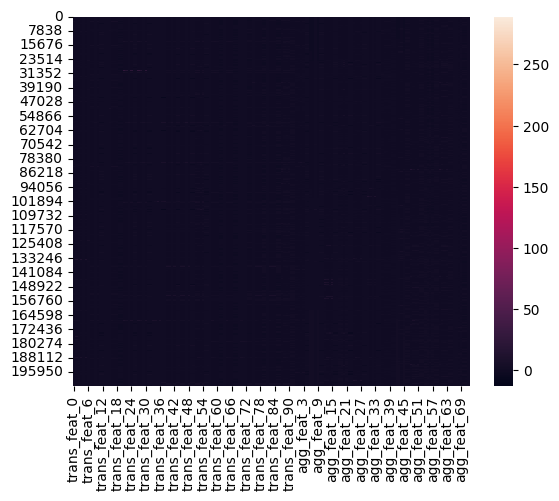

In [16]:
sns.heatmap(vertical)

In [30]:
# We consider Fraud Like "1" and Not Fraud like "0"
non_fraud = vertical[vertical['Class'] == 0].sample(1000)
fraud = vertical[vertical['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [31]:
df

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.172807,-0.180358,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163466,-0.169283,-0.049707,...,-0.563154,1.461330,1.461369,0.018279,4.680175,11.396150,10.584701,1.519700,1.521399,1
1,-0.170701,-0.132897,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.161310,-0.167157,-0.049707,...,-0.556847,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
2,-0.132551,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.163146,-0.144838,0.107868,...,-0.613614,0.241128,0.241406,0.018279,-0.049041,-0.038193,-0.011377,-1.760926,-1.760984,1
3,-0.172980,-0.066347,0.463609,-0.046932,-0.024025,-0.113002,0.242712,-0.163646,-0.169454,-0.049652,...,-0.588384,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
4,-0.160899,-0.194918,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.151282,-0.157270,-0.049707,...,0.042360,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21260,-0.172929,0.453737,1.573595,2.129156,-0.063725,-0.113002,9.067300,-0.163645,-0.169448,-0.049673,...,-0.361316,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
21261,-0.171990,-0.132897,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163215,-0.168883,-0.048315,...,-0.556847,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
21262,-0.148866,-0.184668,-1.201369,-0.121970,0.234026,-0.113002,-0.061584,-0.138970,-0.145130,-0.049707,...,0.239467,-0.172775,-0.047650,-0.098889,0.181652,0.105092,-0.043682,-0.005576,0.387542,1
21263,1.224512,-0.173804,1.018602,-0.121970,0.134776,-0.113002,-0.061584,1.266199,1.240345,-0.049707,...,1.629540,0.254544,0.063145,-0.098889,0.008632,-0.013233,-0.121018,-0.037906,-0.281686,1


In [32]:

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [43]:
class Model_pipeline:

    from sklearn.metrics import accuracy_score
    from sklearn.naive_bayes import GaussianNB
    from sklearn.linear_model import LogisticRegression
    from sklearn import svm
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import SGDClassifier
    from sklearn.neighbors import KNeighborsClassifier

    def __init__(self,X,Y):

        self.X = X
        self.Y = Y

    def eval_model_scores(self):

        X_train, X_test, y_train, y_test = train_test_split(self.X, self.Y, test_size=0.33, random_state=42)
        
        models = [
            RandomForestClassifier(n_estimators=50,random_state=42, criterion='entropy',max_depth=None, min_samples_split=2),
            svm.SVC(gamma="scale",kernel="rbf"),
            GaussianNB(),
            DecisionTreeClassifier(),
            LogisticRegression(),
            SGDClassifier(),
            KNeighborsClassifier()]
        model_names = ['rf','svm','dt','nb', 'lr', 'sgd', 'kn']

        accuracy = []
        for model in models:
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            accuracy.append(model.score(X_test, y_test))
        
        for i in range(7):
    
            print("Accuracy for " + model_names[i] + ": %.2f%%" % (accuracy[i] * 100.0))


data = Model_pipeline(X,Y)

In [44]:
data.return_data()

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for rf: 95.30%
Accuracy for svm: 95.06%
Accuracy for dt: 88.69%
Accuracy for nb: 90.57%
Accuracy for lr: 95.08%
Accuracy for sgd: 95.08%
Accuracy for kn: 95.14%


In [33]:
models = [
    RandomForestClassifier(n_estimators=50,random_state=42, criterion='entropy',max_depth=None, min_samples_split=2),
    svm.SVC(gamma="scale",kernel="rbf"),
    GaussianNB(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    KNeighborsClassifier()
    
    
]

model_names = ['rf','svm','dt','nb', 'lr', 'sgd', 'kn']

In [34]:
accuracy = []
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))
        
for i in range(8):
    
    print("Accuracy for " + model_names[i] + ": %.2f%%" % (accuracy[i] * 100.0))

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for rf: 95.30%
Accuracy for svm: 95.06%
Accuracy for dt: 88.69%
Accuracy for nb: 91.01%
Accuracy for lr: 95.08%
Accuracy for sgd: 94.54%
Accuracy for kn: 95.14%


IndexError: list index out of range